In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
import sys
sys.path.append(r'K:\Ml Projects\Placement Predictor\career-path-pro\scripts')
from extract import load_data
df=load_data()

display(df.head())



,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
display(df.describe())
display(df.info())


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


None

In [13]:
df.isnull().sum()
#Removing the Rows With Null Values
df.dropna(inplace=True)
numerical_features=[col for col in df.columns if df[col].dtypes=='int64' or df[col].dtypes=='float64']
numeric_df=df[numerical_features]
display(numeric_df.head())
print(numerical_features)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,8,8,4
1,97,5.52,5.37,8,7,8,0
2,109,5.36,5.83,9,3,1,1
3,122,5.47,5.75,6,1,6,1
4,96,7.91,7.69,7,8,10,2


['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']


In [5]:
for col in df.columns:
    unique_values=df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print("\n\n")

Column: College_ID
Unique values: ['CLG0030' 'CLG0061' 'CLG0036' 'CLG0055' 'CLG0004' 'CLG0015' 'CLG0071'
 'CLG0096' 'CLG0097' 'CLG0057' 'CLG0063' 'CLG0077' 'CLG0064' 'CLG0017'
 'CLG0053' 'CLG0040' 'CLG0070' 'CLG0050' 'CLG0068' 'CLG0072' 'CLG0034'
 'CLG0087' 'CLG0073' 'CLG0024' 'CLG0008' 'CLG0025' 'CLG0018' 'CLG0014'
 'CLG0006' 'CLG0082' 'CLG0090' 'CLG0075' 'CLG0094' 'CLG0089' 'CLG0016'
 'CLG0076' 'CLG0047' 'CLG0054' 'CLG0058' 'CLG0100' 'CLG0046' 'CLG0001'
 'CLG0041' 'CLG0093' 'CLG0027' 'CLG0062' 'CLG0081' 'CLG0028' 'CLG0020'
 'CLG0051' 'CLG0069' 'CLG0088' 'CLG0038' 'CLG0029' 'CLG0035' 'CLG0019'
 'CLG0005' 'CLG0026' 'CLG0066' 'CLG0045' 'CLG0043' 'CLG0074' 'CLG0048'
 'CLG0012' 'CLG0099' 'CLG0011' 'CLG0091' 'CLG0083' 'CLG0080' 'CLG0044'
 'CLG0059' 'CLG0031' 'CLG0039' 'CLG0065' 'CLG0079' 'CLG0095' 'CLG0085'
 'CLG0033' 'CLG0007' 'CLG0037' 'CLG0032' 'CLG0049' 'CLG0056' 'CLG0084'
 'CLG0067' 'CLG0098' 'CLG0042' 'CLG0021' 'CLG0009' 'CLG0010' 'CLG0078'
 'CLG0013' 'CLG0003' 'CLG0092' 'CLG0086' 'C

In [14]:
df["Internship_Experience"].value_counts()
df["Internship_Experience"] = df["Internship_Experience"].replace({"No":0,"Yes":1})

df["Placement"].value_counts()
df["Placement"] = df["Placement"].replace({"No":0,"Yes":1})
print(df.head())

  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

   Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                      0                       8                     8   
1                      0                       7                     8   
2                      0                       3                     1   
3                      1                       1                     6   
4                      0                       8                    10   

   Projects_Completed  Placement  
0                   4          0  
1                   0          0  
2                   1          0  
3                 

C:\Users\kush3\AppData\Local\Temp\ipykernel_15916\4254448460.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Internship_Experience"] = df["Internship_Experience"].replace({"No":0,"Yes":1})
C:\Users\kush3\AppData\Local\Temp\ipykernel_15916\4254448460.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Placement"] = df["Placement"].replace({"No":0,"Yes":1})


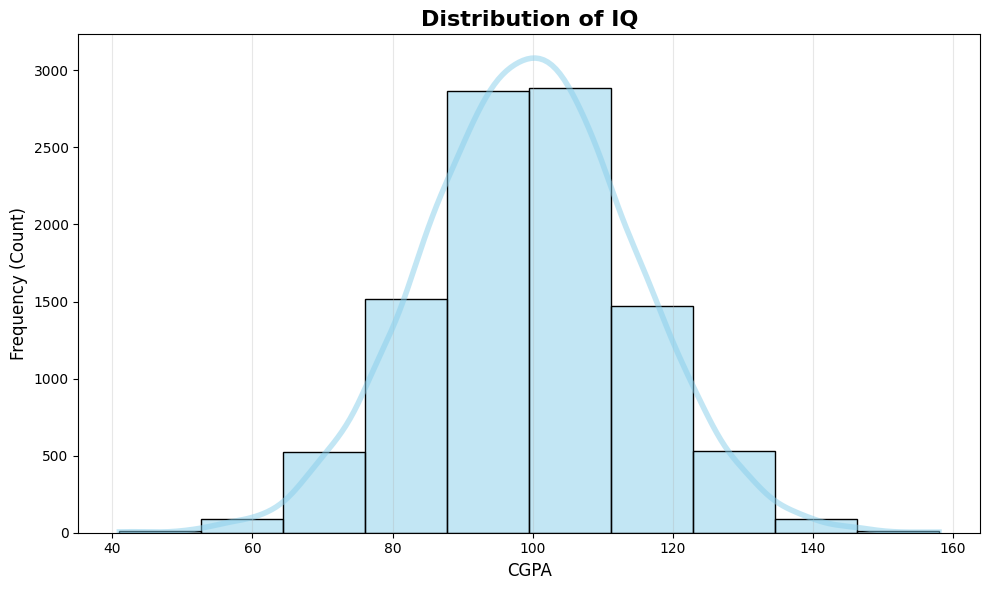

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x=numerical_features[0],
    bins=10,
    kde=True,
    color='skyblue',
    edgecolor='black',
    linewidth=1,
    line_kws={
        "color":'red',
        'linewidth':4,
        'alpha':0.5
    }
)

plt.title(f'Distribution of {numerical_features[0]}',fontsize=16 ,fontweight='bold')
plt.xlabel('CGPA',fontsize=12)
plt.ylabel('Frequency (Count)',fontsize=12)
plt.grid(axis='x',alpha=0.3)
plt.tight_layout()
plt.show()

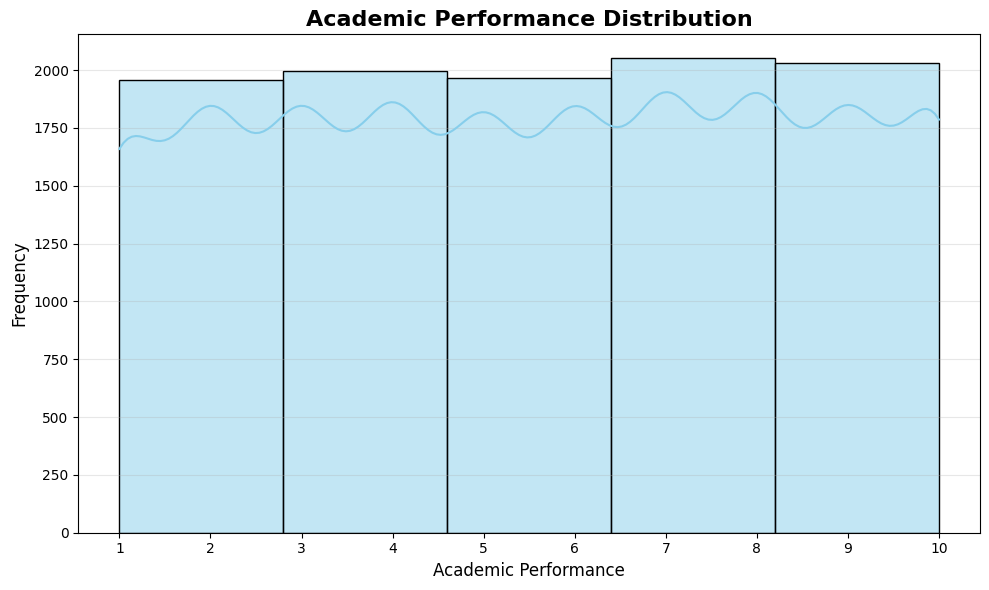

In [49]:
import numpy as np

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='Academic_Performance',
    bins=5,
    kde=True,
    color='skyblue',
    edgecolor='black'
)


#plt.xlim(1, 10)


plt.xticks(np.arange(1, 11, 1)) 

plt.title('Academic Performance Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Academic Performance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

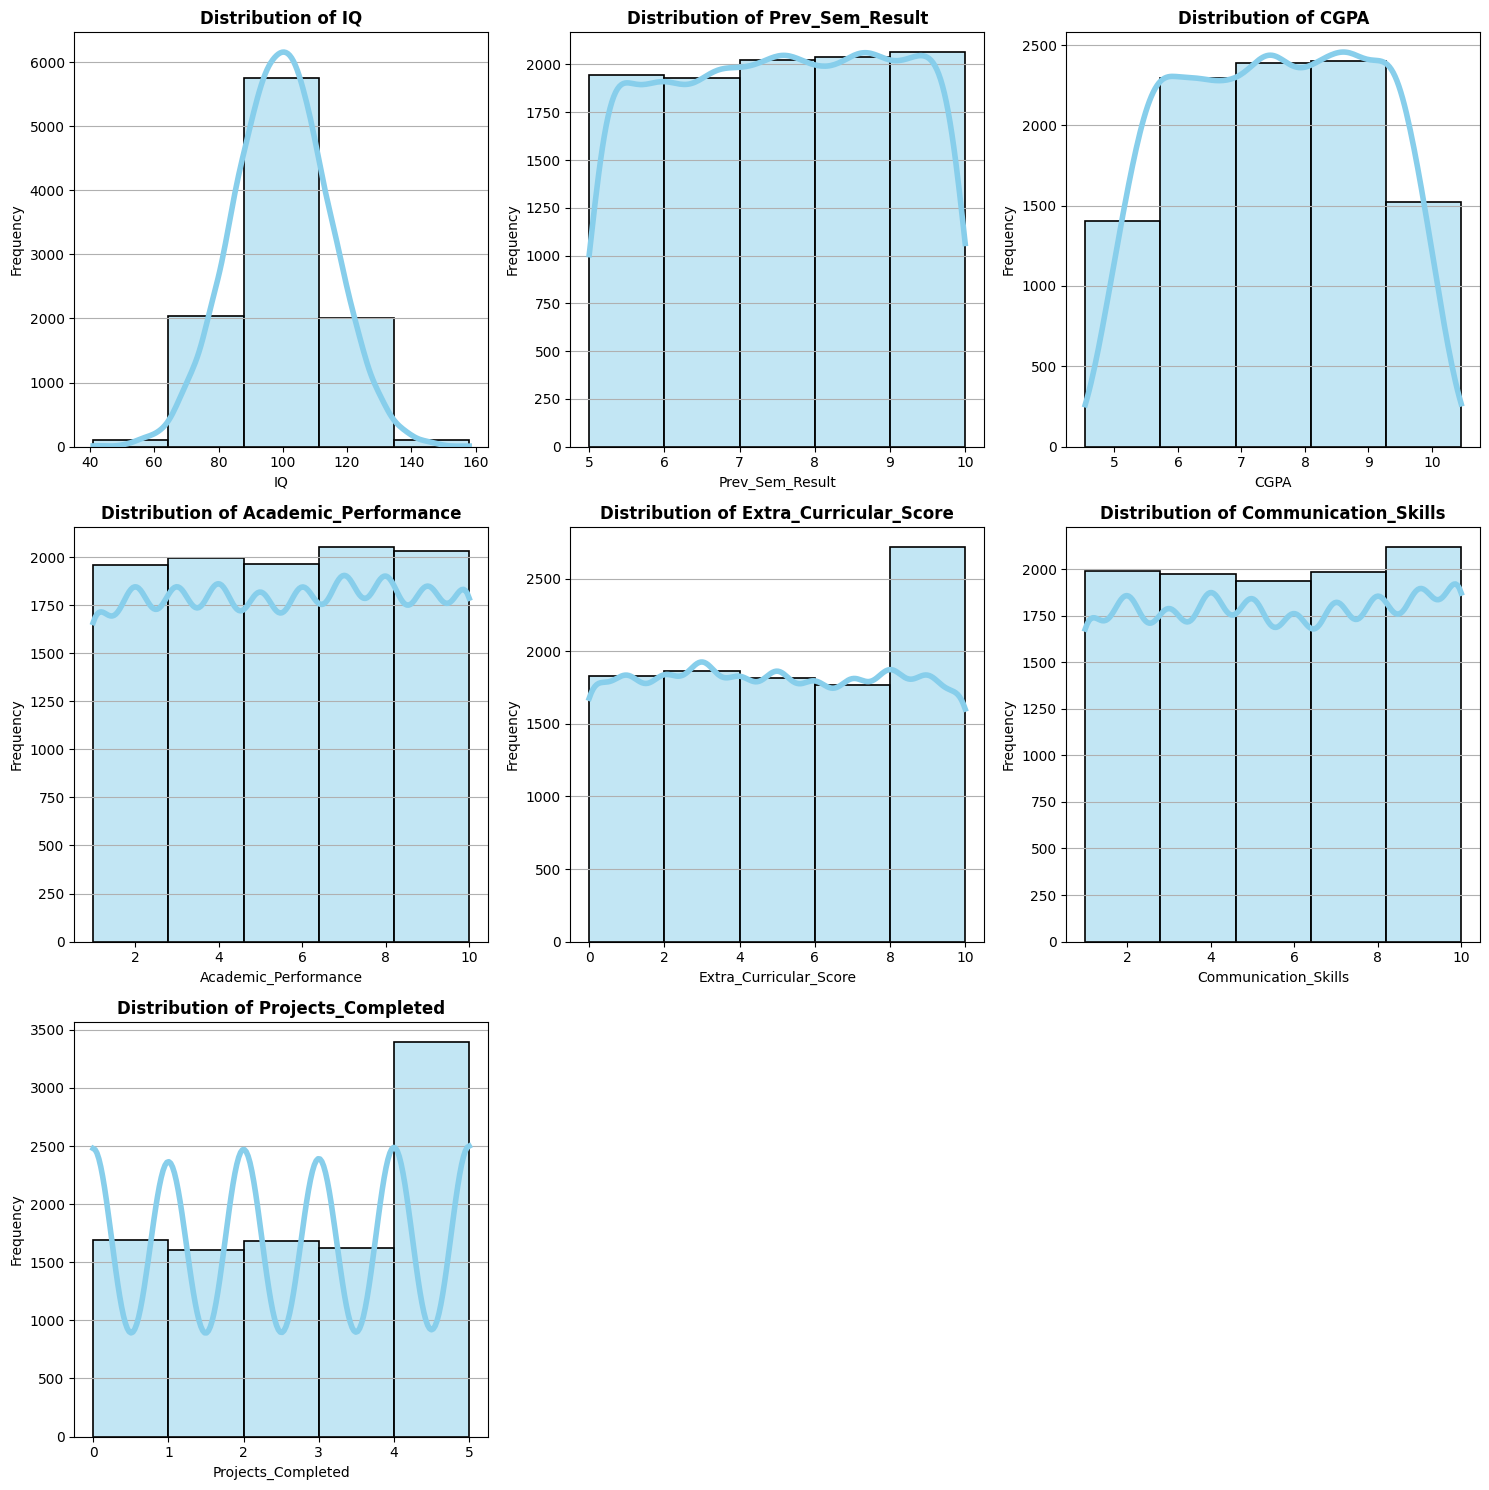

In [77]:
fig,axes=plt.subplots(
    3,
    3,
    figsize=(15,15)
)

axes=axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.histplot(
        data=df,
        x=feature,
        bins=5,
        kde=True,
        ax=axes[idx],
        color="skyblue",
        edgecolor="black",
        line_kws={"color":"red","linewidth":4},
        linewidth=1.2
    )

    axes[idx].set_title(f"Distribution of {feature}",fontsize=12,fontweight="bold")
    axes[idx].set_xlabel(feature,fontsize=10)
    axes[idx].set_ylabel("Frequency",fontsize=10)
    axes[idx].grid(axis='y',alpha=1)
  
axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.savefig("Distribution of Numerical Features.png",dpi=300,bbox_inches="tight")
plt.show()
    

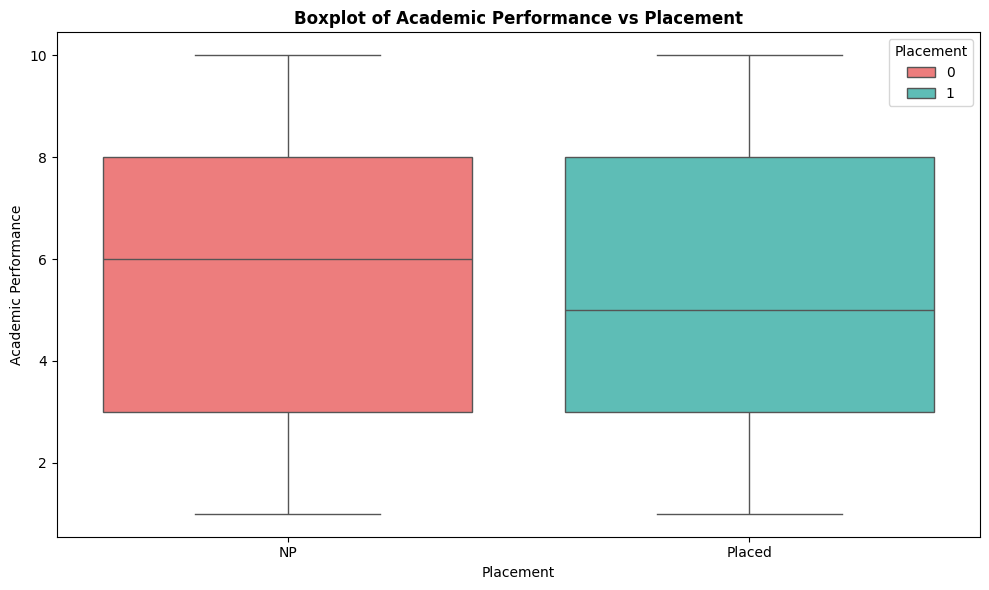

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    y=numerical_features[3],
    x='Placement',
    hue='Placement',
    palette=['#FF6B6B', '#4ECDC4'],
)

plt.title("Boxplot of Academic Performance vs Placement",fontsize=12,fontweight="bold"  )
plt.xlabel("Placement")
plt.ylabel("Academic Performance")
plt.xticks([0,1],['Not Placed','Placed'])
plt.tight_layout()
plt.show()

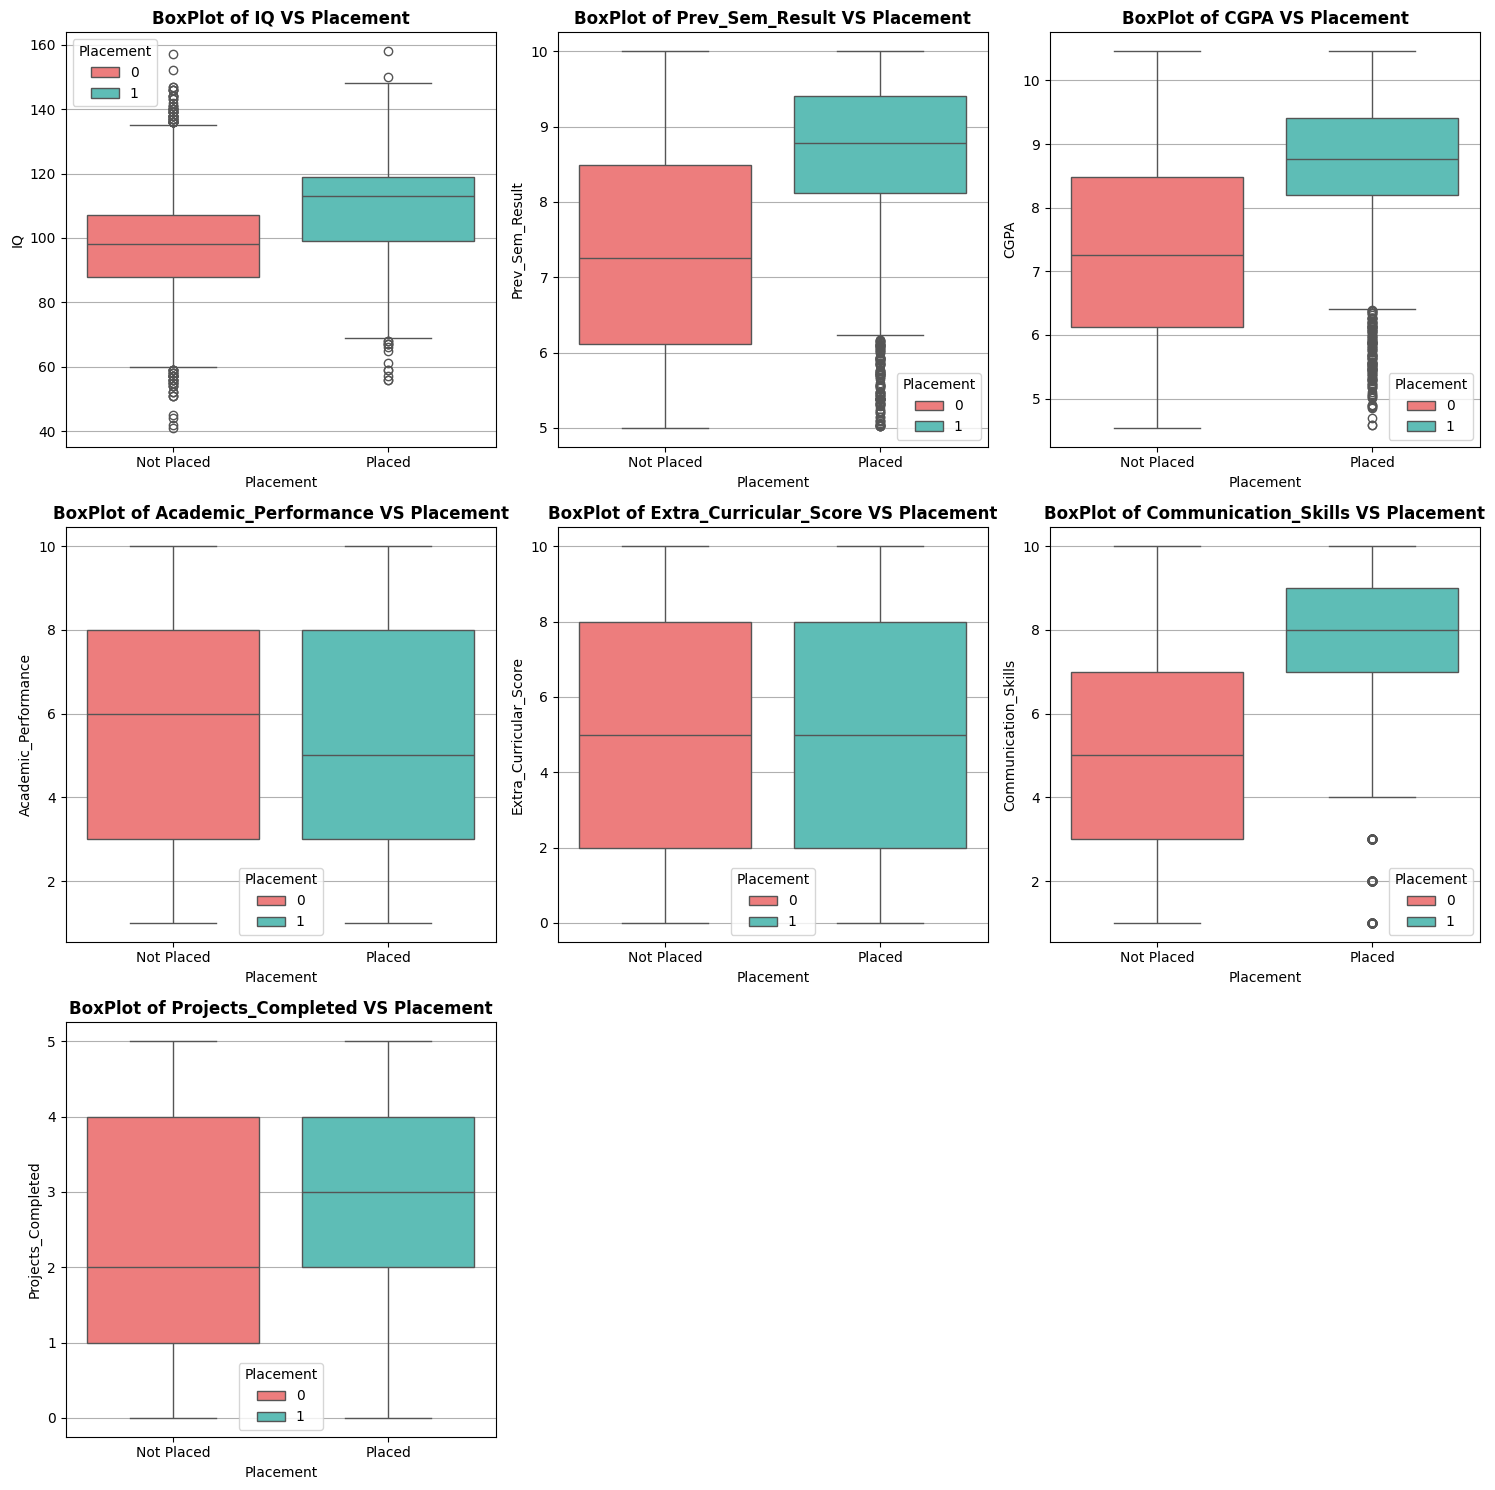

In [76]:
figure , axes = plt.subplots(3,3,figsize=(15,15))

axes=axes.flatten()


for idx , feature in enumerate(numerical_features):
    sns.boxplot(
        data=df,
        x='Placement',
        hue='Placement',
        y=feature,
        palette=['#FF6B6B', '#4ECDC4'],
        ax=axes[idx]
    )
    axes[idx].set_title(f"BoxPlot of {feature} VS Placement",fontsize=12,fontweight="bold")
    axes[idx].set_xlabel("Placement",fontsize=10)
    axes[idx].set_ylabel(feature,fontsize=10)
    axes[idx].set_xticks([0, 1], ['Not Placed', 'Placed'])
    axes[idx].grid(axis='y',alpha=1)

axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.savefig("BoxPlot of Numerical Features VS Placement.png",dpi=300,bbox_inches="tight")
plt.show()  


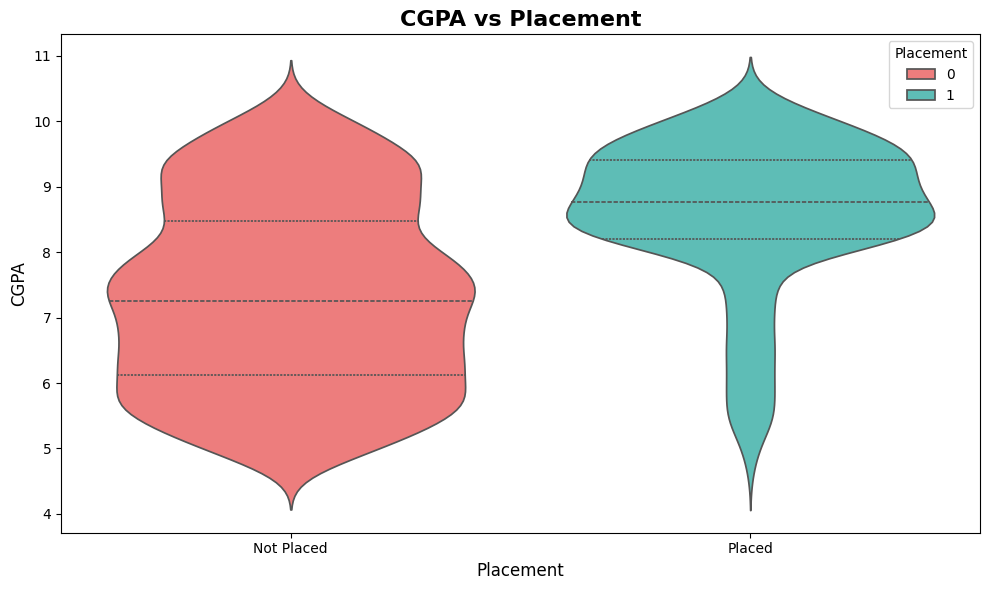

In [72]:
plt.figure(figsize=(10,6))

sns.violinplot(
    data=df,
    y="CGPA",
    x="Placement",
    palette=['#FF6B6B', '#4ECDC4'],
    hue="Placement",
    inner="quartile"
)

plt.title("CGPA vs Placement", fontsize=16, fontweight="bold")
plt.xlabel("Placement", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.tight_layout()
plt.show()


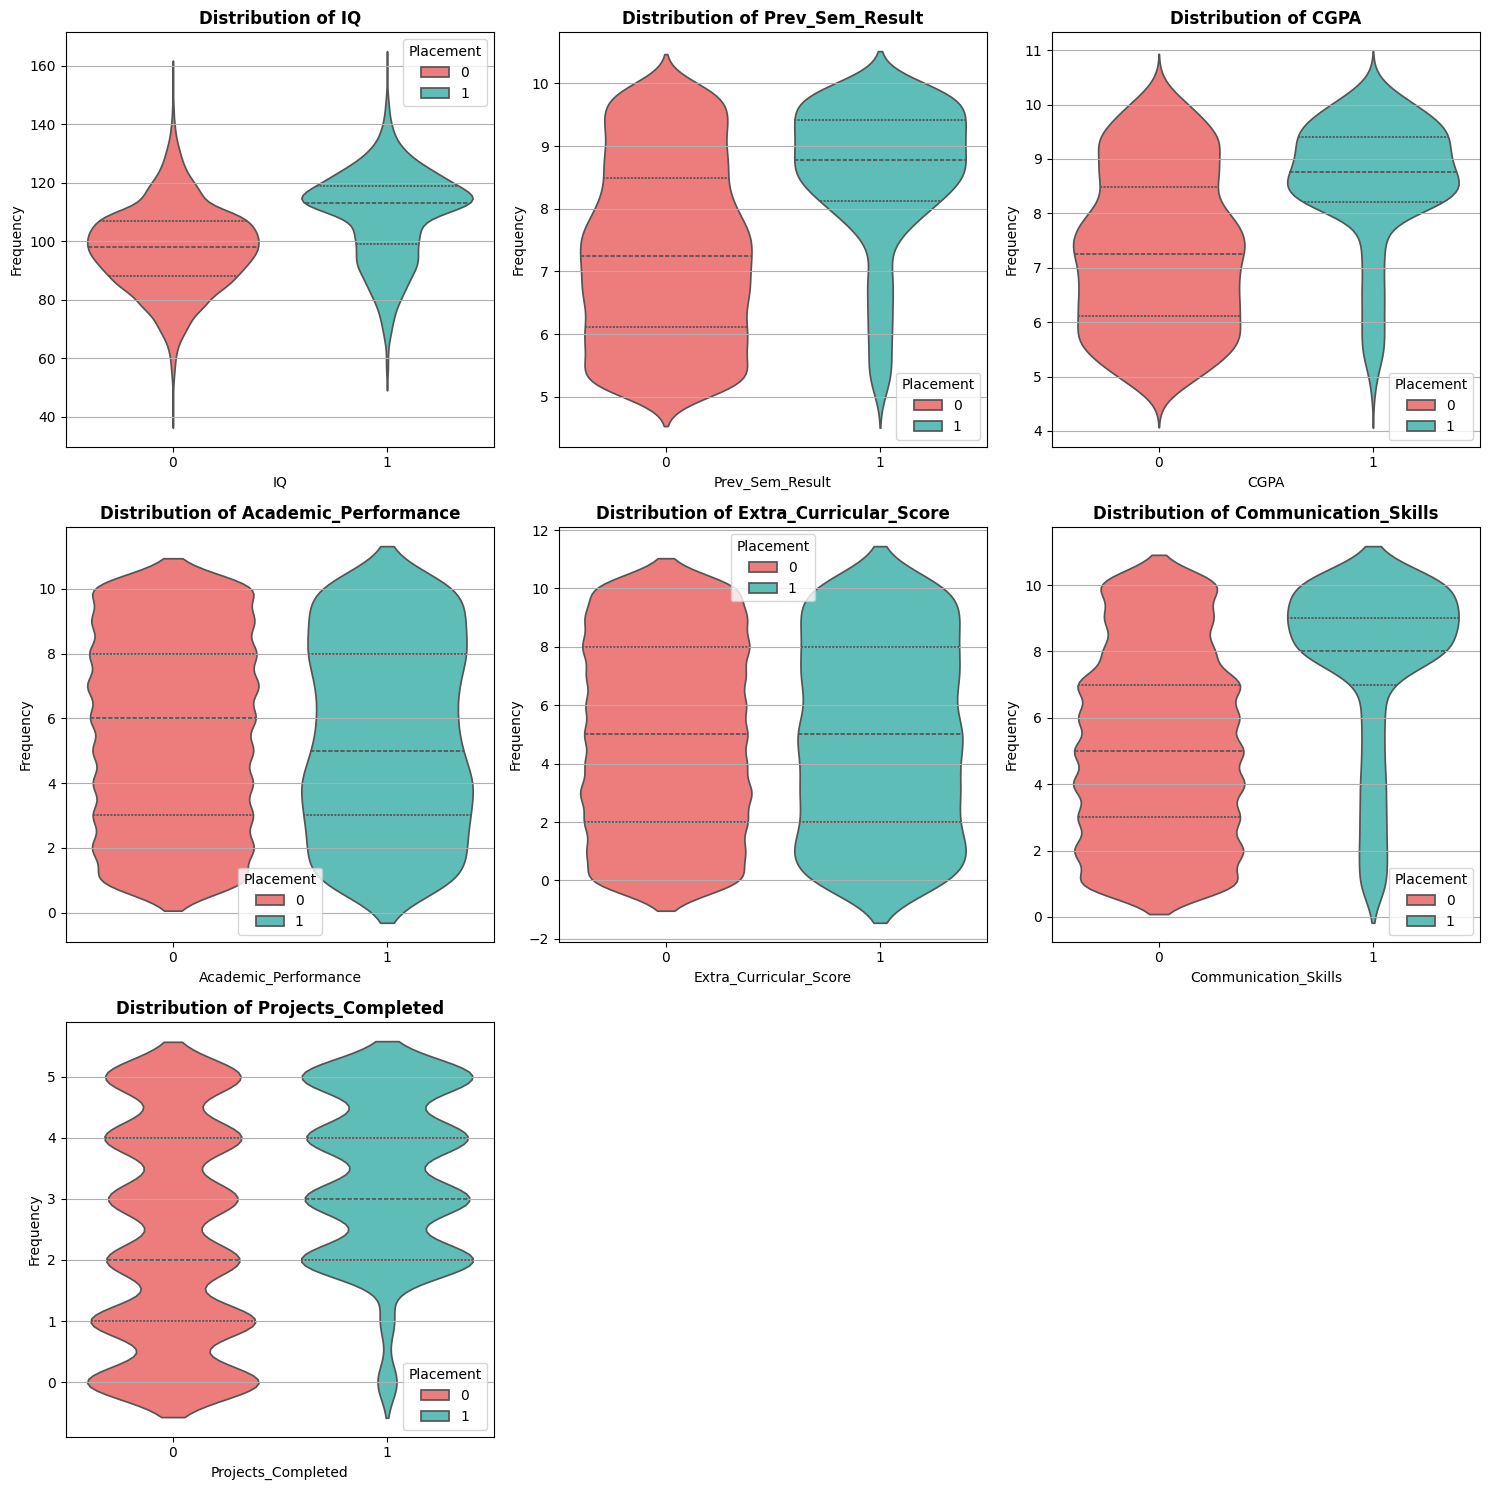

In [75]:
figure , axes =plt.subplots(3,3,figsize=(15,15))

axes=axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.violinplot(
        data=df,
        x="Placement",
        y=feature,
        ax=axes[idx],
        hue="Placement",
        inner="quartile",
        palette=['#FF6B6B', '#4ECDC4'],
    )

    axes[idx].set_title(f"Distribution of {feature}",fontsize=12,fontweight="bold")
    axes[idx].set_xlabel(feature,fontsize=10)
    axes[idx].set_ylabel("Frequency",fontsize=10)
    axes[idx].grid(axis='y',alpha=1)
  
axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.savefig("Violin plots of Numerical Features Vs Placement.png",dpi=300,bbox_inches="tight")
plt.show()  

In [15]:
numeric_df=df.select_dtypes(include=["int64","float64"])
correlation_matrix=numeric_df.corr()
print("\nCorrelation with Placement (Target):")
display(correlation_matrix["Placement"].sort_values(ascending=False))


Correlation with Placement (Target):


Placement                 1.000000
Communication_Skills      0.323155
CGPA                      0.321607
Prev_Sem_Result           0.317896
IQ                        0.285914
Projects_Completed        0.217499
Extra_Curricular_Score   -0.004740
Internship_Experience    -0.005841
Academic_Performance     -0.014920
Name: Placement, dtype: float64

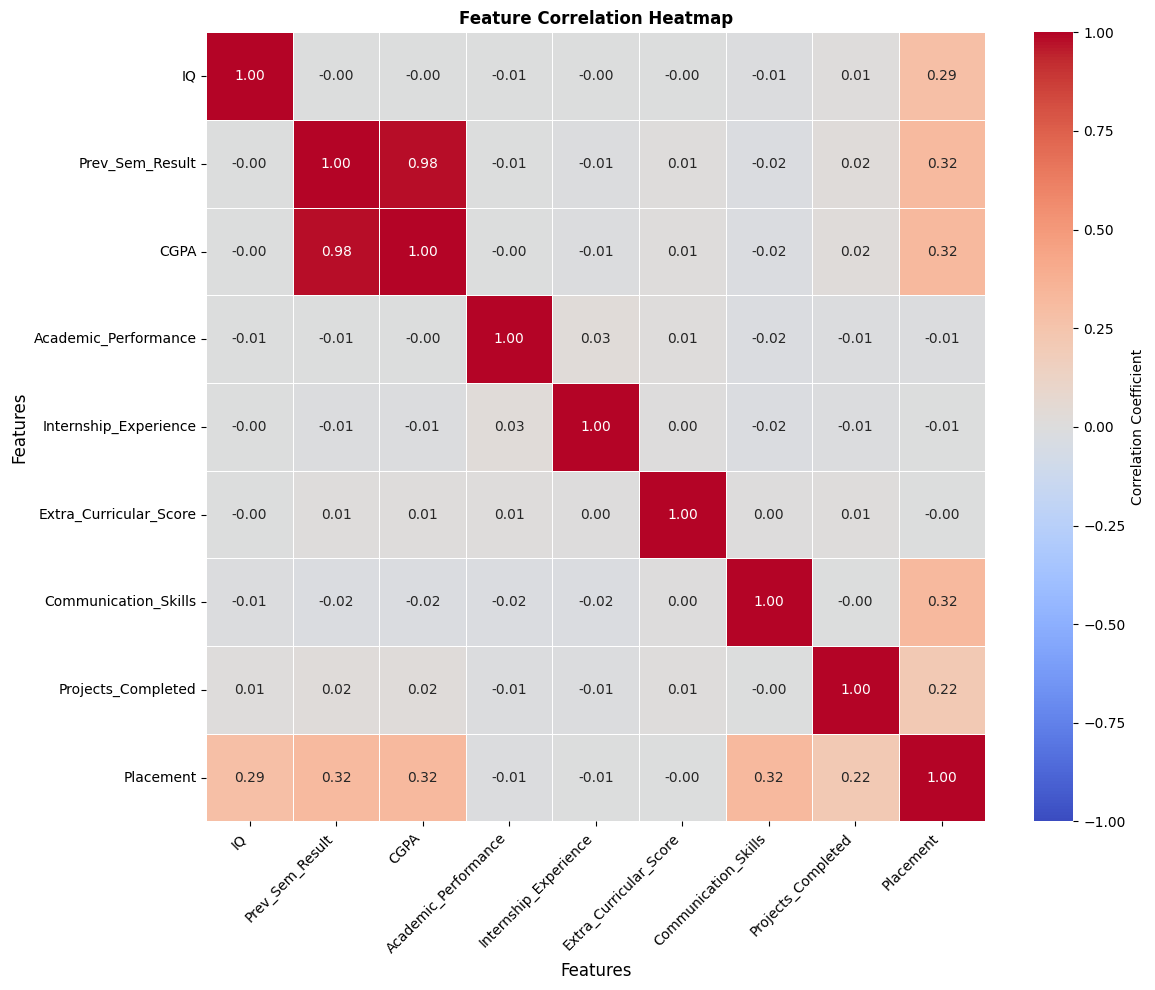

In [18]:
plt.figure(figsize=(12,10))
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    #mask=mask,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    vmin=-1,
    vmax=1
)

plt.title("Feature Correlation Heatmap", fontsize=12,fontweight="bold")
plt.xlabel("Features",fontsize=12),
plt.ylabel("Features",fontsize=12),
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_heatmap.png",dpi=300,bbox_inches="tight")
plt.show()
